In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
gmv_df = pd.read_csv("gmv_w_adas.csv")

In [3]:
gmv_df = gmv_df.drop(columns=["Unnamed: 0"])

In [4]:
ad_v_all = gmv_df
ad_v_all["diagnosis"] = gmv_df["diagnosis"].apply(lambda x: 1 if x == "AD" else 0)

In [5]:
ad_v_all

,PTID,TOTAL11,diagnosis,roi_0_gmv,roi_1_gmv,roi_2_gmv,roi_3_gmv,roi_4_gmv,roi_5_gmv,roi_6_gmv,...,roi_236_gmv,roi_237_gmv,roi_238_gmv,roi_239_gmv,roi_240_gmv,roi_241_gmv,roi_242_gmv,roi_243_gmv,roi_244_gmv,roi_245_gmv
0,005_S_0324,10.67,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,127_S_0844,19.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,023_S_1289,26.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,023_S_0030,23.00,0,0,236,0,978,0,1019,0,...,0,0,0,0,0,0,0,0,0,0
4,016_S_1326,17.33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,116_S_0382,2.33,0,0,0,0,43,0,34,0,...,0,1,0,49,0,3,0,7,0,24
112,032_S_1169,6.33,0,1,0,0,0,0,0,0,...,137,203,2,192,48,36,6,203,43,111
113,136_S_0196,8.67,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,021_S_0984,8.33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = ad_v_all.drop(columns=["PTID", "diagnosis", "TOTAL11"])
y = ad_v_all["diagnosis"]

In [7]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis()

In [8]:
clf.coef_

array([[-1.16081936e+00, -8.92273988e-01, -7.61202601e-01,
         1.13187464e+00, -1.96657194e-02, -1.93936415e-01,
         3.32029549e-01, -1.67461442e+01,  5.92979879e-01,
         4.04412344e+00, -2.93774911e-01,  8.56913590e-02,
         5.03756753e-03, -1.62464769e-01,  3.82221243e-02,
         1.31196762e-01,  2.42194589e-01, -7.04553169e-03,
         1.84058276e-02, -4.02229593e-01,  1.50038916e-02,
         2.75439442e-01,  3.89220285e-01,  2.16985949e-01,
         1.92276177e+00, -7.05412323e-01, -5.35999783e-02,
         1.44096641e-01,  6.55099944e-01, -2.78334093e-01,
         1.57986729e-01, -6.19892395e-01,  3.04372140e-12,
         8.08702430e-01, -5.08099632e-02, -3.74276979e-01,
         1.44170052e-01,  1.42312871e-01,  3.20956121e-12,
        -8.98295622e-01, -1.00927972e-01, -5.36217115e-01,
         7.60068134e-02,  3.09013822e-01,  3.92506541e-02,
         5.90026935e-02, -1.23097449e-01,  3.35009403e-01,
         9.69401233e-02,  5.62975053e-01,  8.06042304e-0

In [9]:
import numpy as np
import seaborn as sns

In [10]:
boundary = np.dot(clf.coef_, X.T) - clf.intercept_

In [11]:
boundary[0].shape

(116,)

In [12]:
X.values[:, 0].shape

(116,)

In [13]:
ave_gmv = np.average(X.values, axis=1)
ave_gmv.shape

(116,)

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Scan Index')

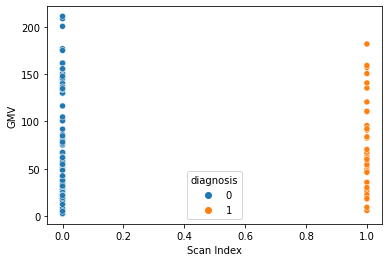

In [15]:
sns.scatterplot(x=gmv_df["diagnosis"], y=ave_gmv, hue=gmv_df["diagnosis"])
plt.ylabel("GMV")
plt.xlabel("Scan Index")

In [16]:
gmv_df

,PTID,TOTAL11,diagnosis,roi_0_gmv,roi_1_gmv,roi_2_gmv,roi_3_gmv,roi_4_gmv,roi_5_gmv,roi_6_gmv,...,roi_236_gmv,roi_237_gmv,roi_238_gmv,roi_239_gmv,roi_240_gmv,roi_241_gmv,roi_242_gmv,roi_243_gmv,roi_244_gmv,roi_245_gmv
0,005_S_0324,10.67,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,127_S_0844,19.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,023_S_1289,26.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,023_S_0030,23.00,0,0,236,0,978,0,1019,0,...,0,0,0,0,0,0,0,0,0,0
4,016_S_1326,17.33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,116_S_0382,2.33,0,0,0,0,43,0,34,0,...,0,1,0,49,0,3,0,7,0,24
112,032_S_1169,6.33,0,1,0,0,0,0,0,0,...,137,203,2,192,48,36,6,203,43,111
113,136_S_0196,8.67,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,021_S_0984,8.33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def map_colors(x):
    if x == 'AD':
        return 'r'
    elif x == 'MCI':
        return 'y'
    else:
        return 'g'
cols = gmv_df[[f"roi_{i}_gmv" for i in range(246)]]
x = range(246)
colors = gmv_df['diagnosis'].apply(map_colors)
x, c, col = np.meshgrid(x, cols, colors)

In [18]:
x.shape

(28536, 246, 116)

In [19]:
c.shape

(28536, 246, 116)

In [20]:
col.flat[:5]

array(['g', 'g', 'g', 'g', 'g'], dtype=object)

In [ ]:
plt.figure(figsize=(10,15))
print("resized")
plt.scatter(x.flat, c.flat, alpha=0.1, marker=".", c=col.flat)
print("plotted")
plt.ylabel("GMV")
plt.xlabel("Scan Index")
plt.show()

resized
plotted


In [ ]:
print("test")

In [60]:
sns.lineplot(x=X[0], y=boundary[0].T)

KeyError: 0